<a href="https://colab.research.google.com/github/MahediBuilds/ML-Lab/blob/main/Lab%203/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

[628715.75342466]
[859554.79452055]
Coefficient: [135.78767123]
Intercept: 180616.43835616432


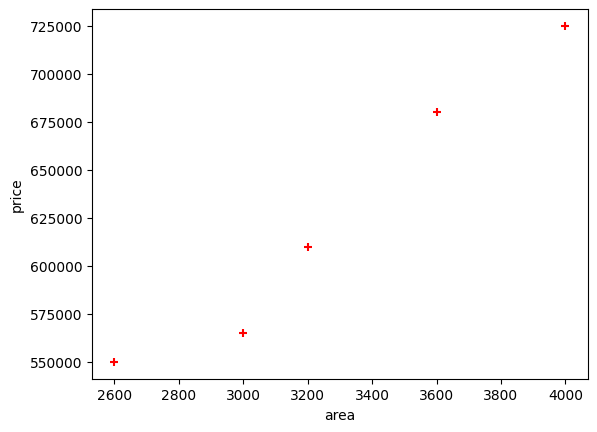

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')

plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

X = df[['area']]   # keep as DataFrame
y = df['price']

reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict properly
print(reg.predict(pd.DataFrame({'area':[3300]})))
print(reg.predict(pd.DataFrame({'area':[5000]})))

print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)

Multi Regression

In [ ]:
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('homeprices_Multiple_LR.csv')

# Fill missing bedrooms with median
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

X = df.drop('price', axis='columns')
y = df['price']

reg = linear_model.LinearRegression()
reg.fit(X, y)

# Proper prediction
prediction = reg.predict(pd.DataFrame({
    'area':[3000],
    'bedrooms':[3],
    'age':[40]
}))

print(prediction)


[498408.25158031]


# To Do: Implementation - Linear Regression

Predict canada's per capita income in year 2020. Use the data file canada_per_capita_income.csv file. If required, apply the necessary data processing steps. Using this build a regression model and predict the per capita income for canadian citizens in year 2020

Predicted per capita income in 2020: 41288.69409441762


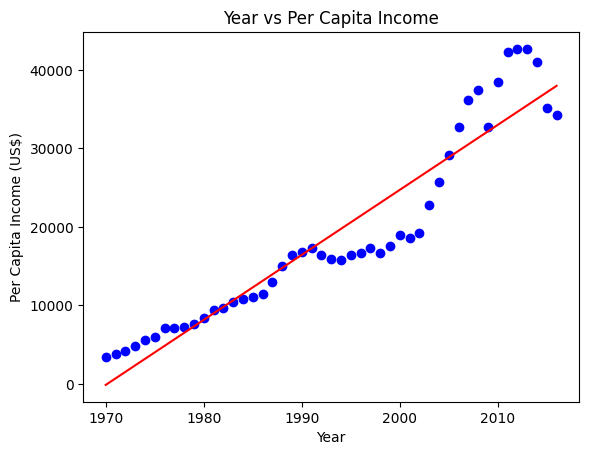

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("canada_per_capita_income.csv")

# Feature and target
X = df[['year']]
y = df['per capita income (US$)']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict for 2020
prediction = model.predict(pd.DataFrame({'year':[2020]}))
print("Predicted per capita income in 2020:", prediction[0])

# --------- Visualization ---------
plt.scatter(df['year'], y, color='blue')        # actual data
plt.plot(df['year'], model.predict(X), color='red')  # regression line
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Year vs Per Capita Income")
plt.show()

Predict Salary of the employee. Use the data file salary.csv file. If required, apply the necessary data processing steps. Using this build a regression model and predict the salary of the employee with 12 years of experience.


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("salary.csv")

# Remove rows with missing values
df['YearsExperience'] = df['YearsExperience'].fillna(df['YearsExperience'].mean())

# Feature and target
X = df[['YearsExperience']]
y = df['Salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 12 years experience
prediction = model.predict(pd.DataFrame({'YearsExperience':[12]}))

print("Predicted Salary for 12 years experience:", prediction[0])

Predicted Salary for 12 years experience: 139980.88923969213


# To Do: Implementation – Multiple Linear Regression

Considering the data file hiring.csv. The file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a Multiple Linear Regression model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("hiring.csv")

# Convert text experience to numeric
exp_map = {
    'zero':0,'one':1,'two':2,'three':3,'four':4,
    'five':5,'six':6,'seven':7,'eight':8,
    'nine':9,'ten':10,'eleven':11,'twelve':12
}

df['experience'] = df['experience'].map(exp_map)

# Handle missing values
df['experience'] = df['experience'].fillna(0)
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(
    df['test_score(out of 10)'].mean()
)

# Features and target
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict salaries
pred1 = model.predict(pd.DataFrame({
    'experience':[2],
    'test_score(out of 10)':[9],
    'interview_score(out of 10)':[6]
}))

pred2 = model.predict(pd.DataFrame({
    'experience':[12],
    'test_score(out of 10)':[10],
    'interview_score(out of 10)':[10]
}))

print("Salary for (2yr,9,6):", pred1[0])
print("Salary for (12yr,10,10):", pred2[0])

Salary for (2yr,9,6): 53290.892559447646
Salary for (12yr,10,10): 92268.07227783566


Considering the data file 1000_companies.csv. The file contains profit statics for a firm such as R&D Spend, Administration, Marketing Spend and State. Based on these four factors build a Multiple Linear Regression model to predict the profit. Using this predict profit for following,

91694.48  R&D Spend, 515841.3  Administration, 11931.24  Marketing Spend, Florida State


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("1000_companies.csv")

# One-hot encode State column
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Train model
model = LinearRegression()
model.fit(X, y)

# Create input for prediction (Florida)
input_data = pd.DataFrame({
    'R&D Spend':[91694.48],
    'Administration':[515841.3],
    'Marketing Spend':[11931.24],
    'State_Florida':[1],
    'State_New York':[0]
})

# Predict
prediction = model.predict(input_data)

print("Predicted Profit:", prediction[0])

Predicted Profit: 510570.9926108309
